In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [23]:
import pandas

ANIME_PATH = '/Users/devon/Desktop/personai_icartoonface_dettrain'

df = pandas.read_csv(ANIME_PATH + '/icartoonface_dettrain.csv', 
    names=['file', 'x1', 'y1', 'x2', 'y2'])


In [28]:
def get_bbox(row):
    return (row['x1'], row['y1'], row['x2'] - row['x1'], row['y2'] - row['y1'])

bbox_dict = {}
for idx, row in df.iterrows():
    fname = row['file']
    if fname in bbox_dict:
        bbox_dict[fname].append(get_bbox(row))
    else:
        bbox_dict[fname] = [get_bbox(row)]

TypeError: 'builtin_function_or_method' object is not subscriptable

In [45]:
k = list(bbox_dict.keys())

personai_icartoonface_dettrain_00225.jpg : [(346, 206, 64, 82), (6, 46, 44, 85)]
# images: 50000
                 x1            y1            x2            y2
count  91163.000000  91163.000000  91163.000000  91163.000000
mean     305.272007    181.903788    412.470311    291.527593
std      187.467248    133.157959    202.493305    141.489490
min        0.000000      0.000000     12.000000     14.000000
25%      170.000000     98.000000    266.000000    203.000000
50%      284.000000    158.000000    404.000000    282.000000
75%      413.000000    237.000000    540.000000    363.000000
max     4569.000000   3543.000000   5000.000000   3945.000000


In [61]:
arr = df.to_numpy()
W = arr[:,3] - arr[:,1]
H = arr[:,4] - arr[:,2]
print(np.sum(W > 25))
print(np.sum(H > 25))

82561
84190


In [75]:
import sys
import importlib
import datagen
importlib.reload(datagen)

import matplotlib.pyplot as plt


gen = datagen.CartoonDataGenerator(ANIME_PATH)

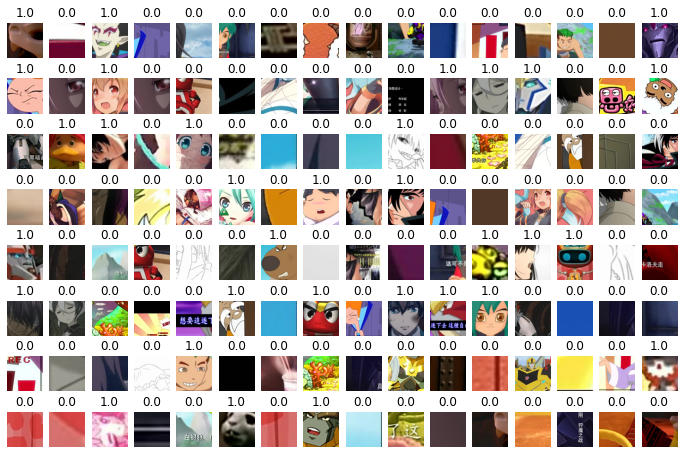

In [176]:
f, axarr = plt.subplots(8, 16, figsize=(12, 8))
axarr = axarr.ravel()

X, y = gen.__getitem__(100)
p = np.random.permutation(len(y))
X = X[p]
y = y[p]
y = y[:,np.newaxis]
for i in range(128):
    axarr[i].imshow(X[i, ...])
    axarr[i].set_title(str(y[i,0]))
    axarr[i].set_axis_off()

In [165]:
import pickle
model = keras.models.load_model('./modelout')
with open('./history.pkl', 'rb') as pfile:
    history = pickle.load(pfile)

In [177]:
predX = model.predict_on_batch(X)
model.evaluate(X, y, batch_size=128)

1/1 [==============================] - 18s 18s/step - loss: 0.1955 - binary_accuracy: 0.9297


[0.19552066922187805, 0.9296875]

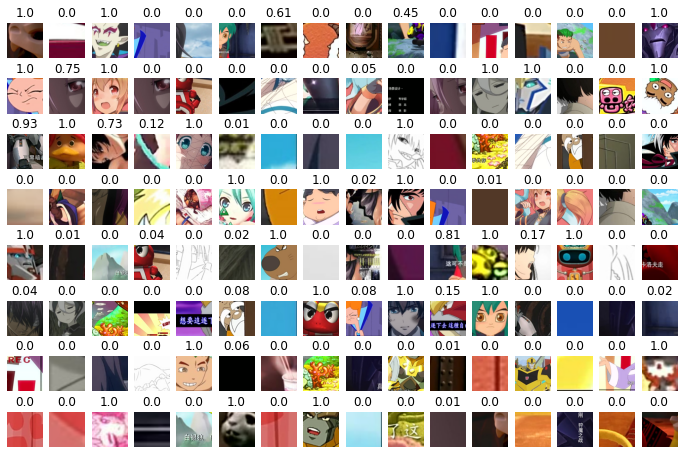

In [178]:
f, axarr = plt.subplots(8, 16, figsize=(12, 8))
axarr = axarr.ravel()

for i in range(128):
    axarr[i].imshow(X[i, ...])
    axarr[i].set_title(str(np.round(predX[i,0], decimals=2)))
    axarr[i].set_axis_off()

{'loss': [1.357204556465149, 0.7809051871299744, 0.6315451860427856, 0.5520729422569275, 0.5120993256568909, 0.4695756733417511, 0.4332951307296753, 0.40296921133995056, 0.37207889556884766, 0.3620641231536865], 'binary_accuracy': [0.834543764591217, 0.9010437726974487, 0.9146749973297119, 0.9218249917030334, 0.924875020980835, 0.9282562732696533, 0.9306562542915344, 0.9322124719619751, 0.934806227684021, 0.9348124861717224], 'val_loss': [0.9090608358383179, 0.7271173596382141, 0.6183264851570129, 0.5872774124145508, 0.5341367125511169, 0.5064793229103088, 0.46047303080558777, 0.4595838785171509, 0.43137550354003906, 0.417397141456604], 'val_binary_accuracy': [0.8873698115348816, 0.9072515964508057, 0.9168168902397156, 0.9175680875778198, 0.9216246008872986, 0.9258062839508057, 0.9272586107254028, 0.9269581437110901, 0.9296875, 0.9295622706413269]}


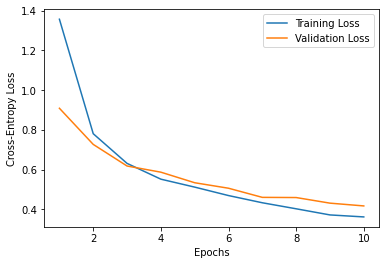

In [171]:
print(history)
plt.plot(np.arange(1, 11), history['loss'], label='Training Loss')
plt.plot(np.arange(1, 11), history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.show()

In [242]:
def gen_heatmap(img):
    pts_x = np.arange(0, img.shape[1] - 224, 32)
    pts_y = np.arange(0, img.shape[0] - 224, 32)
    all_pts_x = np.array([pts_x for _ in pts_y]).ravel()
    all_pts_y = np.array([pts_y for _ in pts_x]).T.ravel()

    hmap = np.zeros(testImg.shape[:2])
    for i in range(len(all_pts_x)):
        if i % (len(all_pts_x) // 4) == 0:
            print(i, '/', len(all_pts_x))
        curr_x = all_pts_x[i]
        curr_y = all_pts_y[i]
        patch = img[curr_y : curr_y + 224, curr_x : curr_x + 224, :]
        val = model.predict(patch[np.newaxis, ...])
        if val > 0.95:
            hmap[curr_y : curr_y + 224, curr_x : curr_x + 224] += 0.1
    return hmap

(480, 848, 3)
0 / 160
40 / 160
80 / 160
120 / 160


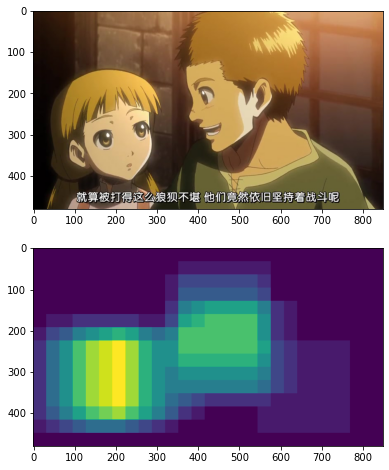

In [243]:
testImg = plt.imread(ANIME_PATH + '/icartoonface_dettrain/' + k[4321])
print(testImg.shape)
hmap = gen_heatmap(testImg)
fig = plt.figure(figsize=(8,8))
fig.add_subplot(2,1,1)
plt.imshow(testImg)
fig.add_subplot(2,1,2)
plt.imshow(hmap)

(464, 848, 3)
0 / 160
40 / 160
80 / 160
120 / 160


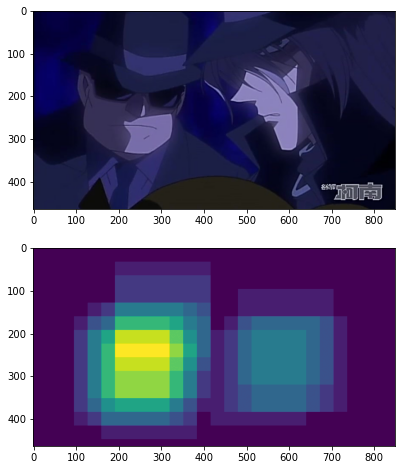

In [254]:
testImg = plt.imread(ANIME_PATH + '/icartoonface_dettrain/' + k[29962])
print(testImg.shape)
hmap = gen_heatmap(testImg)
fig = plt.figure(figsize=(8,8))
fig.add_subplot(2,1,1)
plt.imshow(testImg)
fig.add_subplot(2,1,2)
plt.imshow(hmap)

(480, 624, 3)
0 / 104
26 / 104
52 / 104
78 / 104


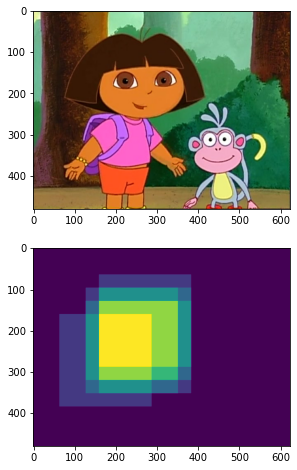

In [256]:
testImg = plt.imread(ANIME_PATH + '/icartoonface_dettrain/' + k[10232])
print(testImg.shape)
hmap = gen_heatmap(testImg)
fig = plt.figure(figsize=(8,8))
fig.add_subplot(2,1,1)
plt.imshow(testImg)
fig.add_subplot(2,1,2)
plt.imshow(hmap)